In [9]:
#Load in relevant libraries
import math

import numpy as np

from astropy import units as u
from astropy import coordinates as coord
from astropy.coordinates import SkyCoord, ICRS, Galactocentric, Distance, LSR
from astropy.coordinates import FK5
from astropy.coordinates import CartesianRepresentation, CartesianDifferential
from astropy.table import Table, vstack, hstack
from astropy.table import Column
from astropy.io import ascii

import gala.potential as gp
import gala.dynamics as gd
from gala.units import galactic

from scipy import stats

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler, normalize

import time

import matplotlib.pyplot as plt

import pandas as pd

In [10]:
#Load in the Monte_Carlo Dataset
Monte_Vals = Table.read('Step_4_Monte_Carlo_Output.fits')

#Load in the reduced data set as well
t = Table.read('Step_4_Output.fits')

In [11]:
#The following lines of code calculate the errors for both the galactocentric distances
# and the actions required.

sample_size = int(len(Monte_Vals)/len(t))

#Begin with open lists that will be appended
Er_x_val = []
Er_y_val = []
Er_z_val = []

Er_U = []
Er_V = []
Er_W = []

Er_En = []
Er_Lz = []
Er_Lperp = []

#Calculating the standard deviations for each value
for i in range(0, len(t)):
    Monte_Vals_Sub = Monte_Vals[sample_size*i:sample_size*(i+1)]
    
    x_val_error = np.std(Monte_Vals_Sub['x_val'])
    y_val_error = np.std(Monte_Vals_Sub['y_val'])
    z_val_error = np.std(Monte_Vals_Sub['z_val'])
    
    U_error = np.std(Monte_Vals_Sub['U'])
    V_error = np.std(Monte_Vals_Sub['V'])
    W_error = np.std(Monte_Vals_Sub['W'])
    
    Energy_error = np.std(Monte_Vals_Sub['Energy'])
    Lz_error = np.std(Monte_Vals_Sub['Lz'])
    L_perp_error = np.std(Monte_Vals_Sub['L_perp'])
    
    #The Standard Deviations are then appended to the empty lists
    Er_x_val.append(x_val_error)
    Er_y_val.append(y_val_error)
    Er_z_val.append(z_val_error)

    Er_U.append(U_error)
    Er_V.append(V_error)
    Er_W.append(W_error)

    Er_En.append(Energy_error)
    Er_Lz.append(Lz_error)
    Er_Lperp.append(L_perp_error)
    
    #End of loop

x_val_error = Column(Er_x_val,'x_val_error')
y_val_error = Column(Er_y_val,'y_val_error')
z_val_error = Column(Er_z_val,'z_val_error')

U_error = Column(Er_U,'U_error')
V_error = Column(Er_V,'V_error')
W_error = Column(Er_W,'W_error')

Energy_error = Column(Er_En,'Energy_error')
Lz_error = Column(Er_Lz,'Lz_error')
L_perp_error = Column(Er_Lperp,'L_perp_error')

#Add all the calculated errors to the cluster table

t.add_column(x_val_error)
t.add_column(y_val_error)
t.add_column(z_val_error)

t.add_column(U_error)
t.add_column(V_error)
t.add_column(W_error)

t.add_column(Energy_error)
t.add_column(Lz_error)
t.add_column(L_perp_error)

#Save a new table with the newly calculated errors for all the actions
t.write('Step_5_Output.fits',overwrite=True)
print("Total Number of Stars in Data Set: " + str(len(t)))

Total Number of Stars in Data Set: 348


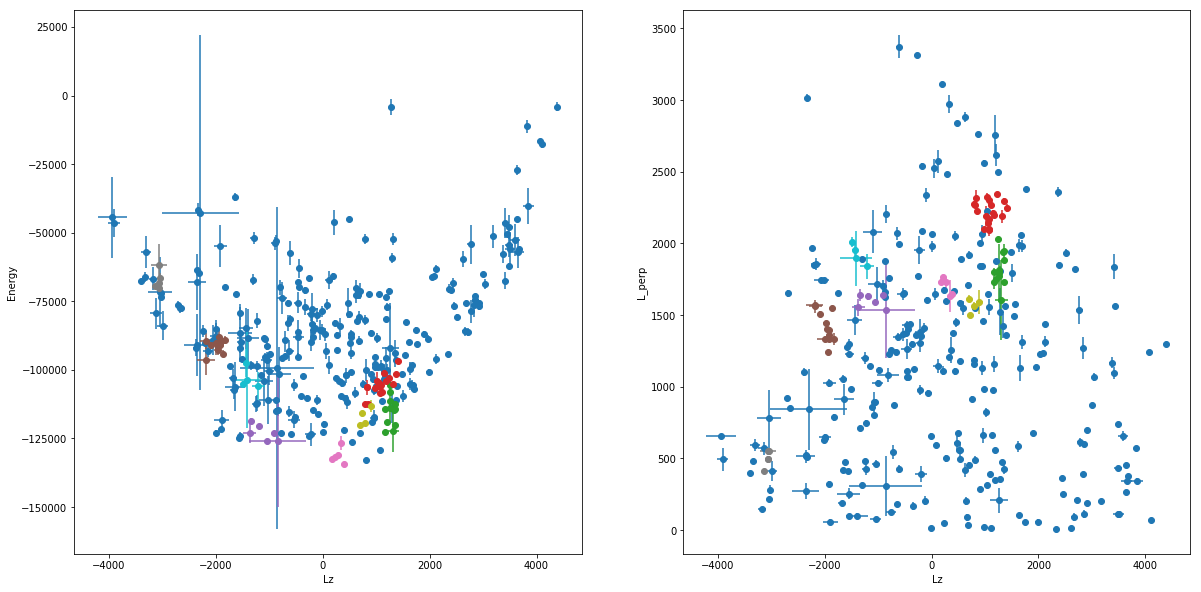

In [12]:
#It Might be conveinient to plot the distributions with errors the code for
# it is below.

#The following scatterplot will have error bars for each corresponding data value
#Lz vs Energy
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xlabel('Lz')
plt.ylabel('Energy')
for i in range(-1,np.ndarray.max(t['cluster_label']+1)):
    table2=t[(t['cluster_label']==i) & (t['Energy']<0)]
    x = table2['Lz']
    y = table2['Energy']
    
    ex = table2['Lz_error']
    ey = table2['Energy_error']
    
    plt.errorbar(x, y, xerr=ex, yerr=ey, fmt='o')

#If you need to save the figure produces de-comment the line below 
#pyplot.savefig('E1_Lz_vs_E_Cluster_Plot.png', dpi = 300, overwrite=True)

#Lz vs L_perp
plt.subplot(122)
plt.xlabel('Lz')
plt.ylabel('L_perp')
for i in range(-1,np.ndarray.max(t['cluster_label']+1)):
    table2=t[(t['cluster_label']==i) & (t['Energy']<0)]
    x = table2['Lz']
    y = table2['L_perp']
    
    ey = table2['L_perp_error']
    ex = table2['Lz_error']
    plt.errorbar(x, y, xerr=ex, yerr=ey, fmt='o')

#If you need to save the figure produces de-comment the line below 
#pyplot.savefig('E1_Lz_vs_L_perp_Cluster_Plot.png', dpi = 300, overwrite=True)